# Import libraries

In [ ]:
import os
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random as rn
import tensorflow

# Setting Seed

In [ ]:
SEED = 123457
os.environ['PYTHONHASHSEED']=str(SEED)
np.random.seed(SEED)
tensorflow.random.set_seed(SEED)
rn.seed(SEED)

# Connecting with Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Fetching Data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/appstore_games.csv')
df.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/7/2008,30/5/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/7/2008,17/5/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/7/2008,5/9/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/7/2008,30/5/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/7/2008,22/7/2018


In [ ]:
# Converting Date columns from Object type to datetime type
df['Original Release Date'] =  pd.to_datetime(df['Original Release Date'])
df['Current Version Release Date'] =  pd.to_datetime(df['Original Release Date'])

# Univariate and Bivariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   URL                           17007 non-null  object        
 1   ID                            17007 non-null  int64         
 2   Name                          17007 non-null  object        
 3   Subtitle                      5261 non-null   object        
 4   Icon URL                      17007 non-null  object        
 5   Average User Rating           7561 non-null   float64       
 6   User Rating Count             7561 non-null   float64       
 7   Price                         16983 non-null  float64       
 8   In-app Purchases              7683 non-null   object        
 9   Description                   17007 non-null  object        
 10  Developer                     17007 non-null  object        
 11  Age Rating                  

In [ ]:
df.describe()

,ID,Average User Rating,User Rating Count,Price,Size
count,1.700700e+04,7561.000000,7.561000e+03,16983.000000,1.700600e+04
mean,1.059614e+09,4.060905,3.306531e+03,0.813419,1.157064e+08
std,2.999676e+08,0.751428,4.232256e+04,7.835732,2.036477e+08
min,2.849214e+08,1.000000,5.000000e+00,0.000000,5.132800e+04
25%,8.996543e+08,3.500000,1.200000e+01,0.000000,2.295014e+07
50%,1.112286e+09,4.500000,4.600000e+01,0.000000,5.676895e+07
75%,1.286983e+09,4.500000,3.090000e+02,0.000000,1.330271e+08
max,1.475077e+09,5.000000,3.032734e+06,179.990000,4.005591e+09


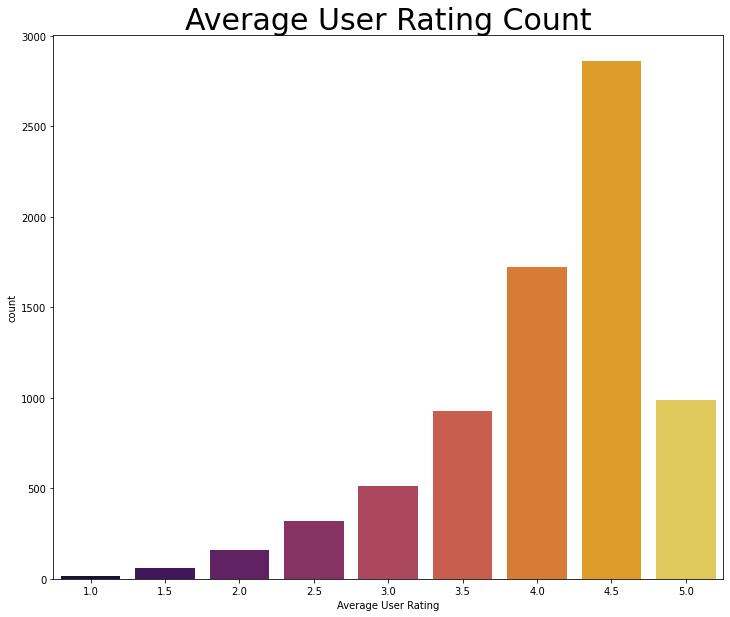

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Average User Rating Count', fontsize = 30)
sns.countplot(data = df, x ='Average User Rating', palette = 'inferno')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



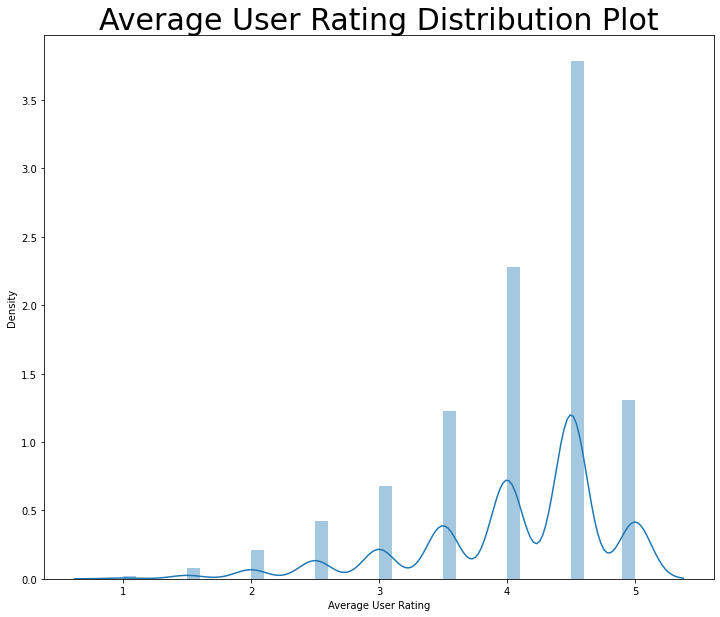

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Average User Rating Distribution Plot', fontsize = 30)
sns.distplot(df['Average User Rating'])
plt.show()

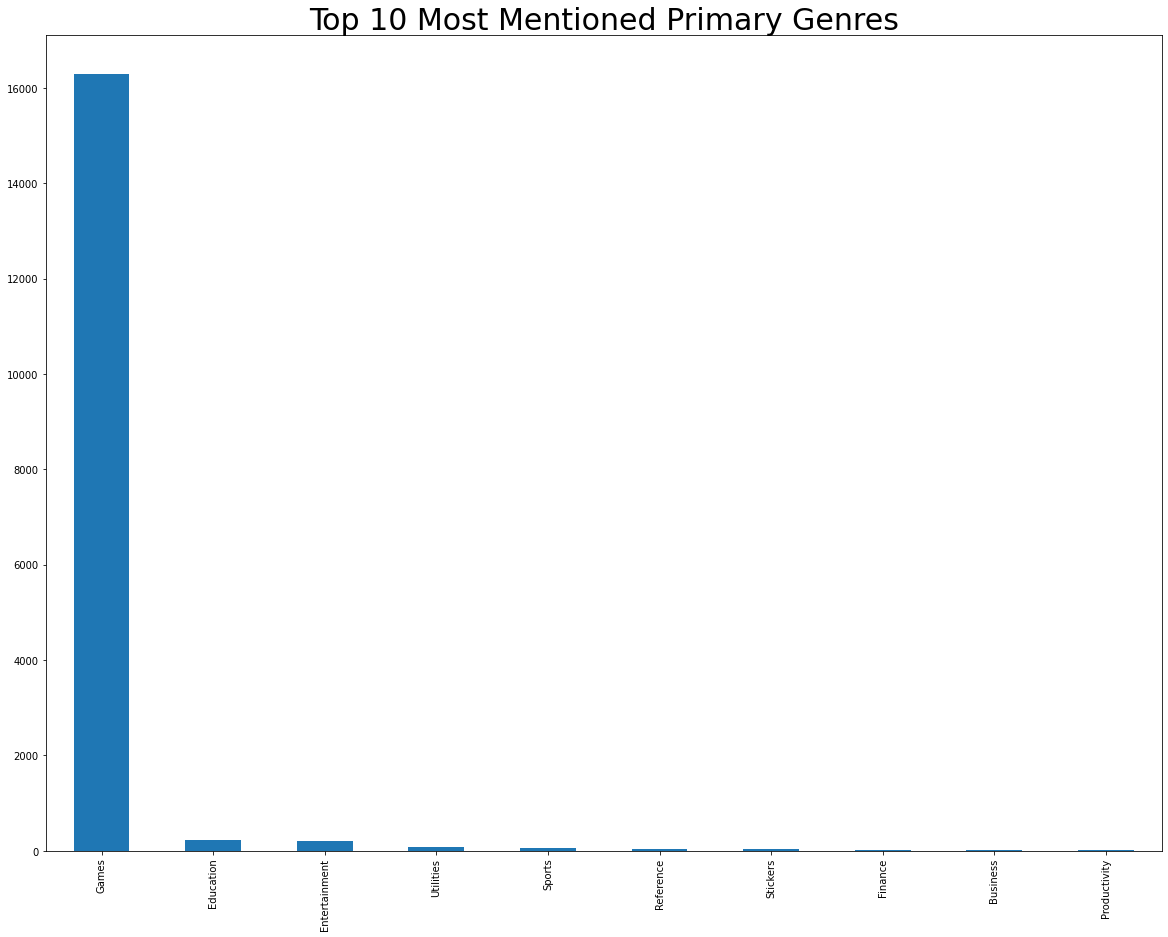

In [ ]:
plt.figure(figsize=(20,15))
plt.title('Top 10 Most Mentioned Primary Genres', fontsize = 30)
df['Primary Genre'].value_counts()[:10].plot(kind = 'bar')
plt.show()

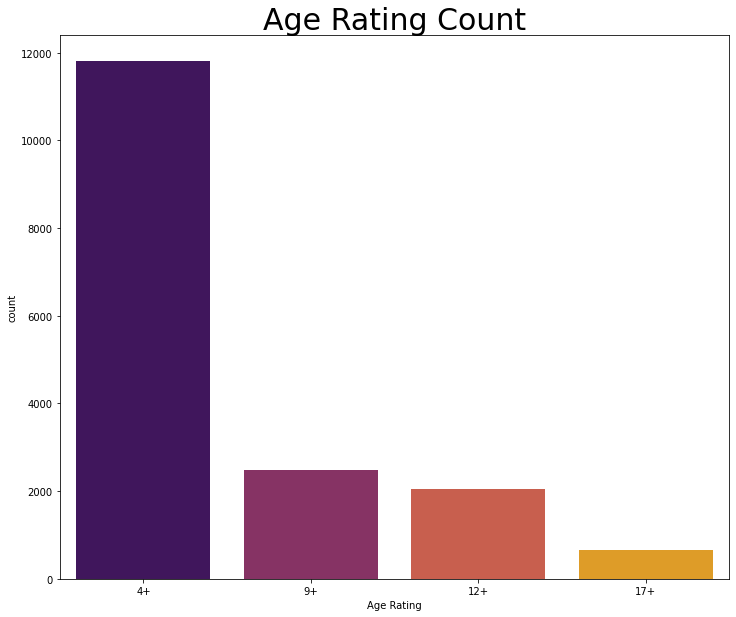

In [ ]:
plt.figure(figsize=(12,10))
plt.title('Age Rating Count', fontsize = 30)
sns.countplot(data = df, x ='Age Rating', palette = 'inferno')
plt.show()

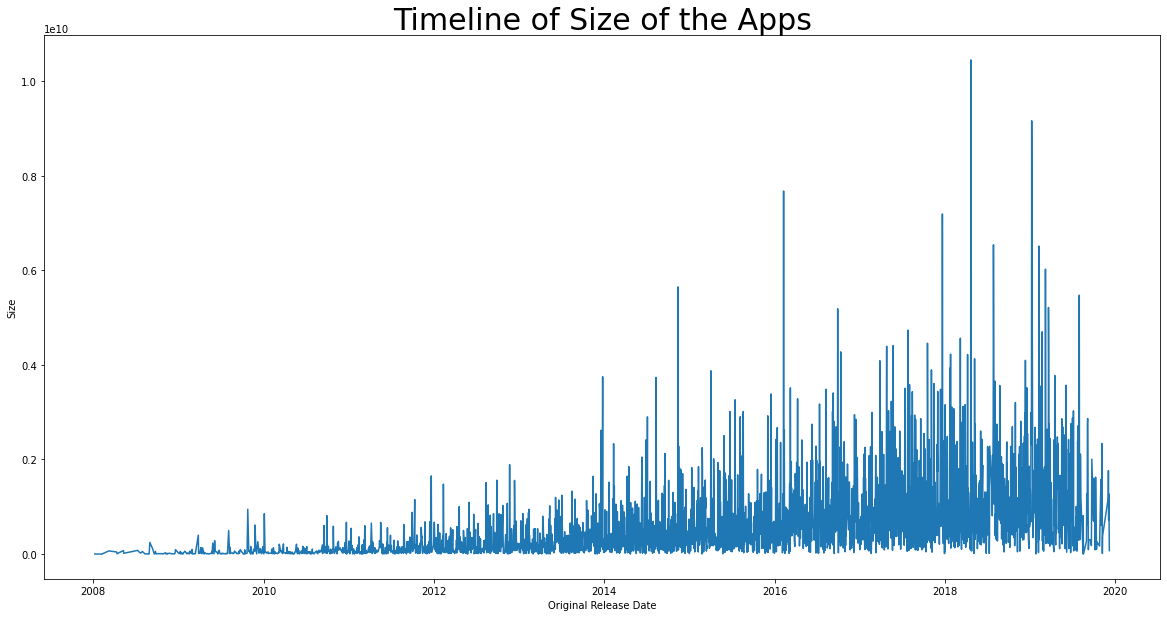

In [ ]:
plt.figure(figsize=(20,10))
plt.title('Timeline of Size of the Apps', fontsize = 30)
data = df.groupby(['Original Release Date']).Size.sum().reset_index()
sns.lineplot(data = data, x = 'Original Release Date', y = 'Size')
plt.show()

# One Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder 
from sklearn.compose import ColumnTransformer 
sample = df[['Average User Rating','User Rating Count']].dropna().copy()
print(sample.head())

   Average User Rating  User Rating Count
0                  4.0             3553.0
1                  3.5              284.0
2                  3.0             8376.0
3                  3.5           190394.0
4                  3.5               28.0


In [ ]:
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(sample[['Average User Rating']]).toarray())
enc_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
7556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7557,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7558,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7559,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Pre-processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   URL                           17007 non-null  object        
 1   ID                            17007 non-null  int64         
 2   Name                          17007 non-null  object        
 3   Subtitle                      5261 non-null   object        
 4   Icon URL                      17007 non-null  object        
 5   Average User Rating           7561 non-null   float64       
 6   User Rating Count             7561 non-null   float64       
 7   Price                         16983 non-null  float64       
 8   In-app Purchases              7683 non-null   object        
 9   Description                   17007 non-null  object        
 10  Developer                     17007 non-null  object        
 11  Age Rating                  

In [ ]:
# Dropping unwanted columns
df = df.drop(['URL', 'Icon URL', 'Subtitle', 'In-app Purchases'], axis = 1)
df.columns

Index(['ID', 'Name', 'Average User Rating', 'User Rating Count', 'Price',
       'Description', 'Developer', 'Age Rating', 'Languages', 'Size',
       'Primary Genre', 'Genres', 'Original Release Date',
       'Current Version Release Date'],
      dtype='object')

In [ ]:
# Dropping null values from Size and Languages columns
df = df.dropna(subset=['Size', 'Languages'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16946 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            16946 non-null  int64         
 1   Name                          16946 non-null  object        
 2   Average User Rating           7537 non-null   float64       
 3   User Rating Count             7537 non-null   float64       
 4   Price                         16923 non-null  float64       
 5   Description                   16946 non-null  object        
 6   Developer                     16946 non-null  object        
 7   Age Rating                    16946 non-null  object        
 8   Languages                     16946 non-null  object        
 9   Size                          16946 non-null  float64       
 10  Primary Genre                 16946 non-null  object        
 11  Genres                      

In [ ]:
# Imputing missing values in Average User Rating, User Rating Count and Price columns
df['Average User Rating'].interpolate(method='linear', inplace=True, limit_direction="both")
df['User Rating Count'].interpolate(method='linear', inplace=True, limit_direction="both")
df['Price'].interpolate(method='linear', inplace=True, limit_direction="both")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16946 entries, 0 to 17006
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   ID                            16946 non-null  int64         
 1   Name                          16946 non-null  object        
 2   Average User Rating           16946 non-null  float64       
 3   User Rating Count             16946 non-null  float64       
 4   Price                         16946 non-null  float64       
 5   Description                   16946 non-null  object        
 6   Developer                     16946 non-null  object        
 7   Age Rating                    16946 non-null  object        
 8   Languages                     16946 non-null  object        
 9   Size                          16946 non-null  float64       
 10  Primary Genre                 16946 non-null  object        
 11  Genres                      

# Building Model with PCA

In [ ]:
# Dropping unwanted columns
sample_2 = df.drop(columns= ['Original Release Date','Current Version Release Date', 'ID', 'Name', 'Description', 'Languages', 'Genres'])
sample_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16946 entries, 0 to 17006
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average User Rating  16946 non-null  float64
 1   User Rating Count    16946 non-null  float64
 2   Price                16946 non-null  float64
 3   Developer            16946 non-null  object 
 4   Age Rating           16946 non-null  object 
 5   Size                 16946 non-null  float64
 6   Primary Genre        16946 non-null  object 
dtypes: float64(4), object(3)
memory usage: 1.0+ MB


In [ ]:
sample_2.columns

Index(['Average User Rating', 'User Rating Count', 'Price', 'Developer',
       'Age Rating', 'Size', 'Primary Genre'],
      dtype='object')

In [ ]:
# Label Encoding non-numeric columns
from sklearn.preprocessing import LabelEncoder
trans_col = ['Developer', 'Age Rating', 'Primary Genre']
le = LabelEncoder()
for i in trans_col:
    sample_2[i] = le.fit_transform(sample_2[i])

In [ ]:
sample_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16946 entries, 0 to 17006
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average User Rating  16946 non-null  float64
 1   User Rating Count    16946 non-null  float64
 2   Price                16946 non-null  float64
 3   Developer            16946 non-null  int64  
 4   Age Rating           16946 non-null  int64  
 5   Size                 16946 non-null  float64
 6   Primary Genre        16946 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.0 MB


In [ ]:
# Standardizing featrues
from sklearn.preprocessing import StandardScaler
x = sample_2.drop(['Average User Rating'],1).values
x = StandardScaler().fit_transform(x)

In [ ]:
np.mean(x),np.std(x)

(3.214619560659802e-17, 1.0)

In [ ]:
# Creating DataFrame of Standardized featrues
feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
normalised_feat = pd.DataFrame(x,columns=feat_cols)
normalised_feat.tail()

,feature0,feature1,feature2,feature3,feature4,feature5
16941,-0.090415,-0.103633,1.480422,0.167227,-0.249962,-0.040329
16942,-0.090415,-0.103633,0.988315,0.167227,-0.026441,-0.040329
16943,-0.090415,-0.103633,1.270092,0.167227,-0.454059,-0.040329
16944,-0.090415,-0.103633,1.067389,0.167227,0.397623,-0.040329
16945,-0.090415,-0.103633,1.649810,0.167227,-0.455311,-0.040329


In [ ]:
# Perfroming PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=6)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
finalDf = pd.concat([principalDf, sample_2['Average User Rating']], axis = 1)
finalDf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,Average User Rating
0,-0.464494,-0.008037,0.067977,0.022164,-0.260856,0.310053,4.0
1,-0.495424,0.113007,-0.072162,-0.039385,0.041438,0.257989,3.5
2,-0.545760,0.717150,-0.116114,0.199396,1.152907,0.242679,3.0
3,0.246960,-0.482784,4.500625,4.050697,0.953509,1.284259,3.5
4,-0.390611,-0.315022,0.087966,-0.092750,-0.661205,0.239367,3.5


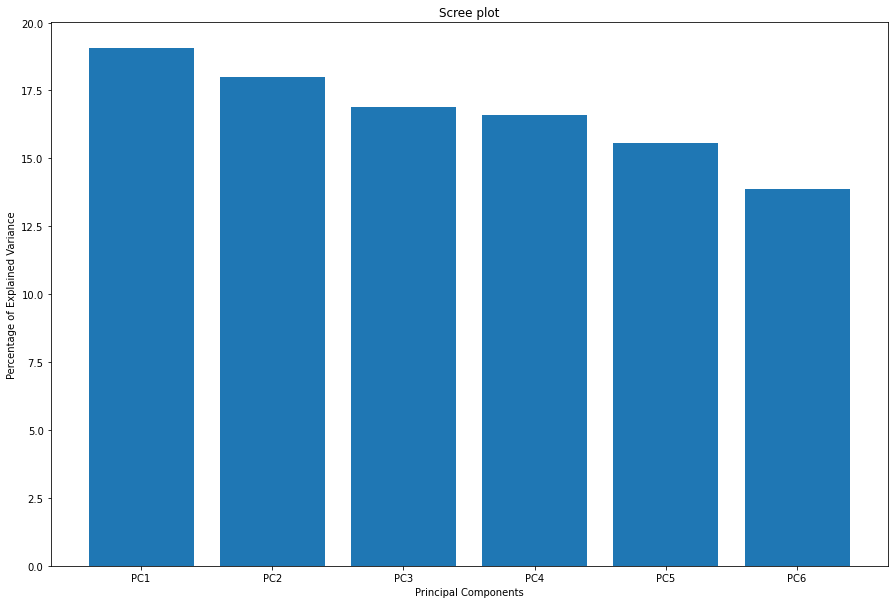

In [ ]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals =2)
labels = ['PC'+str(x) for x in range(1, len(per_var)+1)]
plt.figure(figsize=(15,10))
plt.bar(x = range(1,len(per_var)+1),height = per_var, tick_label = labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Components')
plt.title('Scree plot')
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.19064087, 0.18010333, 0.16902168, 0.16587619, 0.15575417,
       0.13860375])

In [ ]:
finalDf['Average User Rating'].unique()

array([4.        , 3.5       , 3.        ,        nan, 2.5       ,
       2.        , 2.66666667, 3.33333333, 3.83333333, 3.66666667,
       4.5       , 1.5       , 5.        , 3.75      , 3.25      ,
       2.75      , 4.25      , 1.        , 3.16666667, 3.16666667,
       3.33333333, 3.83333333, 4.16666667, 4.33333333, 2.83333333,
       2.25      , 4.75      , 4.375     , 4.125     , 2.875     ,
       2.625     , 4.66666667, 4.83333333, 3.625     , 3.875     ,
       3.125     , 2.375     , 3.66666667, 2.66666667, 2.33333333,
       4.625     , 4.875     , 2.16666667, 3.9       , 3.8       ,
       3.7       , 3.6       , 3.2       , 3.4       , 3.375     ,
       4.40909091, 4.31818182, 4.22727273, 4.13636364, 4.04545455,
       3.95454545, 3.86363636, 3.77272727, 3.68181818, 3.59090909,
       4.57142857, 4.14285714, 3.71428571, 3.28571429, 2.85714286,
       2.42857143, 4.1       , 4.2       , 4.3       , 4.4       ,
       4.07142857, 4.21428571, 4.28571429, 4.35714286, 4.42857

In [ ]:
# Since target variable is continuous, Regression model is suitable for this data
from sklearn.model_selection import train_test_split
X = finalDf.loc[:, finalDf.columns != 'Average User Rating'].dropna()
y = finalDf['Average User Rating'].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
# MLR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.6798532988328442

R2 Score:  -0.005103191851597133


In [ ]:
# Since r2_score is negative Linear Regression is not suitable for the data
# Moving on to next regression model
# SVR
from sklearn.svm import SVR

model2 = SVR()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.6820020841842406

R2 Score:  -0.011466812175816576


In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

model3 = DecisionTreeRegressor()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.9112787297976278

R2 Score:  -0.8058542714022188


In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model4 = RandomForestRegressor()
model4.fit(X_train, y_train)
y_pred = model4.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.6902100141117277

R2 Score:  -0.03595942503506122


In [ ]:
# Lasso Regressor
from sklearn.linear_model import Lasso

model5 = Lasso()
model5.fit(X_train, y_train)
y_pred = model5.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.6781290023204457

R2 Score:  -1.1216493615240353e-05


In [ ]:
# Ridge Regressor
from sklearn.linear_model import Ridge

model6 = Ridge()
model6.fit(X_train, y_train)
y_pred = model6.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("\nR2 Score: ", r2_score(y_test, y_pred))

RMSE:  0.6798515595190647

R2 Score:  -0.005098049013875672


# Building Model without PCA

In [ ]:
# Creating a sample of sample_2 to build the model without PCA
sample_3 = sample_2.copy(deep = False)
sample_3.head()

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre
0,4.0,3553.0,2.99,4782,2,15853568.0,6
1,3.5,284.0,1.99,3976,2,12328960.0,6
2,3.0,8376.0,0.00,903,2,674816.0,6
3,3.5,190394.0,0.00,4782,2,21552128.0,6
4,3.5,28.0,2.99,6043,2,34689024.0,6


In [ ]:
sample_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16946 entries, 0 to 17006
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Average User Rating  16946 non-null  float64
 1   User Rating Count    16946 non-null  float64
 2   Price                16946 non-null  float64
 3   Developer            16946 non-null  int64  
 4   Age Rating           16946 non-null  int64  
 5   Size                 16946 non-null  float64
 6   Primary Genre        16946 non-null  int64  
dtypes: float64(4), int64(3)
memory usage: 1.7 MB


In [ ]:
sample_3.corr()

,Average User Rating,User Rating Count,Price,Developer,Age Rating,Size,Primary Genre
Average User Rating,1.000000,0.041767,-0.044476,-0.004175,0.002525,0.041630,-0.008984
User Rating Count,0.041767,1.000000,-0.005187,0.011357,0.011532,0.032474,-0.002690
Price,-0.044476,-0.005187,1.000000,-0.068767,0.039170,0.033099,-0.005713
Developer,-0.004175,0.011357,-0.068767,1.000000,-0.011993,-0.010162,0.001582
Age Rating,0.002525,0.011532,0.039170,-0.011993,1.000000,-0.141942,-0.020237
Size,0.041630,0.032474,0.033099,-0.010162,-0.141942,1.000000,-0.021838
Primary Genre,-0.008984,-0.002690,-0.005713,0.001582,-0.020237,-0.021838,1.000000


In [ ]:
# Standardizing the features
X2 = sample_3[['User Rating Count','Price','Developer','Age Rating','Size','Primary Genre']].values
X2 = StandardScaler().fit_transform(X2)

In [ ]:
# Creating DataFrame of standardized features
feat_cols = ['feature'+str(i) for i in range(X2.shape[1])]
std_feat = pd.DataFrame(X2,columns=feat_cols)
std_feat.head()

,feature0,feature1,feature2,feature3,feature4,feature5
0,0.027067,0.277620,0.193558,0.167227,-0.490152,-0.040329
1,-0.082037,0.150110,-0.129964,0.167227,-0.507449,-0.040329
2,0.188037,-0.103633,-1.363442,0.167227,-0.564644,-0.040329
3,6.262981,-0.103633,0.193558,0.167227,-0.462185,-0.040329
4,-0.090582,0.277620,0.699714,0.167227,-0.397714,-0.040329


In [ ]:
std_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16946 entries, 0 to 16945
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature0  16946 non-null  float64
 1   feature1  16946 non-null  float64
 2   feature2  16946 non-null  float64
 3   feature3  16946 non-null  float64
 4   feature4  16946 non-null  float64
 5   feature5  16946 non-null  float64
dtypes: float64(6)
memory usage: 794.5 KB


In [ ]:
# Train-Test split with test size of 25%
X2 = std_feat
y2 = sample_3['Average User Rating'].dropna()
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size = 0.25)

In [ ]:
# Linear Regression Model
model1_2 = LinearRegression()
model1_2.fit(X_train2, y_train2)
y_pred2 = model1_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.6709150152231632

R2 Score:  0.004395498622895344


In [ ]:
# Support Vector Regressor
model2_2 = SVR()
model2_2.fit(X_train2, y_train2)
y_pred2 = model2_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.6783721002449191

R2 Score:  -0.017859383396028106


In [ ]:
# Decision Tree Regressor
model3_2 = DecisionTreeRegressor()
model3_2.fit(X_train2, y_train2)
y_pred2 = model3_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.9306355237714459

R2 Score:  -0.9156275781917571


In [ ]:
# Random Forest Regressor
model4_2 = RandomForestRegressor()
model4_2.fit(X_train2, y_train2)
y_pred2 = model4_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.686558426779331

R2 Score:  -0.04257386122161311


In [ ]:
# Ridge Regressor
model5_2 = Ridge()
model5_2.fit(X_train2, y_train2)
y_pred2 = model5_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.6709150176910171

R2 Score:  0.004395491298550325


In [ ]:
# Lasso Regressor
model6_2 = Lasso()
model6_2.fit(X_train2, y_train2)
y_pred2 = model6_2.predict(X_test2)
print("RMSE: ", np.sqrt(mean_squared_error(y_test2, y_pred2)))
print("\nR2 Score: ", r2_score(y_test2, y_pred2))

RMSE:  0.6724006443533463

R2 Score:  -1.8582518726217856e-05


From the above models, Linear and Ridge Regressions have a good fit over the data.